In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib nbagg

In [399]:
n=2
W = tf.Variable(tf.random_normal([n,1]), tf.float32, name = 'weight')
b = tf.Variable(tf.random_normal([1]), tf.float32, name = 'bias')

x = tf.placeholder(tf.float32,shape=[None, n])
y = tf.placeholder(tf.float32,shape=[None, 1])

x_data_unorm = np.linspace(0,40,100)
x_data = x_data_unorm/np.max(x_data_unorm)
y_data_unorm = 2*x_data_unorm**2 + 4*x_data_unorm + 8.5
y_data_unorm = y_data_unorm.reshape((y_data_unorm.size,1))
y_data = 2*x_data**2 + 4*x_data + 8.5
y_data = y_data.reshape((y_data.size,1))

In [400]:

linear_model = tf.add(tf.matmul(x,W),b)

cost = tf.reduce_mean(tf.square(linear_model - y))


In [401]:
# Takes array x and makes it matrix [x^1,x^2,x^3,...,x^n]

def modify_input(x,x_size,n_value):
   x_new=np.zeros([x_size,n_value])    
   for i in range(n_value):
      x_new[:,i]=np.power(x,(i+1))
   return x_new

In [402]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [403]:
%%time
learn_rate = .05
x_modified = modify_input(x_data,x_data.size,n)

optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train = optimizer.minimize(cost)

for i in range(12000):
    sess.run(train,{x: x_modified,y:y_data})
#     if i%1000 == 0:
#          print(sess.run([W,b]))

Wall time: 3.36 s


In [406]:
print(sess.run([W,b]))
x_mod_un = modify_input(x_data_unorm,x_data_unorm.size,n)
values = sess.run(linear_model,{x:x_mod_un})
#print('values ',values.T,x_modified.T)
print('Cost is ',sess.run(cost,{x: x_modified,y: y_data}))


[array([[3.9915528],
       [2.008141 ]], dtype=float32), array([8.501501], dtype=float32)]
Cost is  3.9108053e-07


<IPython.core.display.Javascript object>


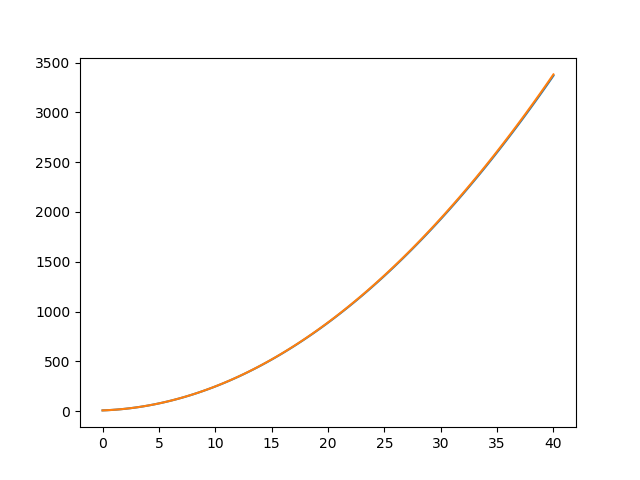

In [405]:
plt.plot(x_data_unorm, y_data_unorm)
plt.plot(x_data_unorm,values)
plt.show()